# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 3</center>
### <center>Ensambles</center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo
* Nicolas Tonizzo

# Imports y preparacion del dataset

En primer lugar instalamos la libreria de xgboost para luego importarla

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
import xgboost as xgb
import random
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv("../dataset/hotels_train_procesado.csv")
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'hotel_encoding',
       'tiene_hijos', 'es_extranjero', 'es_portugues', 'es_ingles',
       'es_frances', 'es_espanol', 'es_aleman', 'reserved_room_was_assigned',
       'required_a_car_parking_space', 'solo_desayuna_en_el_hotel',
       'pidio_todas_comidas', 'reservo_online', 'reservo_en_grupo',
       'reservo_sin_reembols

Declaramos el target y los features del dataframe que vamos a utilizar para predecir.

In [3]:
target = "is_canceled"

attrs = [
    "hotel_encoding",
    
    "lead_time",
    #"reservo_el_mismo_dia",
    "adr",

    "stays_in_weekend_nights",
    #"stays_in_week_nights",

    "tiene_hijos",
    "adults",
    #"children",
    #"babies",

    # Fechas
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "arrival_date_year",

    "es_extranjero",
    "es_portugues",
    "es_ingles",
    "es_frances",
    "es_espanol",
    "es_aleman",

    "reserved_room_was_assigned",

    "is_repeated_guest",
    "previous_cancellations", 
    "previous_bookings_not_canceled",
    "total_reservas_previas",
    "total_of_special_requests",
    "booking_changes",

    # 'meal',
    "solo_desayuna_en_el_hotel",
    "pidio_todas_comidas",

    'required_car_parking_spaces',
    #"required_a_car_parking_space",

    "reservo_sin_reembolso",
    "reservo_sin_depositar",
    "reservo_online",
    "reservo_en_grupo",
    "reservo_sin_compania",
    "reservo_sin_agente",
    "reservo_sin_paquete",
    
    "days_in_waiting_list",
    #"tuvo_dias_de_espera",
    
    "agent9",
    "agent240",
    #"agent1",
    "agent14",
    "agent6",
]

**Dividimos el dataset en entrenamiento y validacion**, para poder validar que no estamos overfitteando al dataset de entrenamiento, y que el modelo predice bien a registros no vistos anteriormente. 

In [4]:
X = df[attrs]
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)

Vamos a empezar definiendo algunos clasificadores de xgb con los parametros por default, pero con muchos estimadores. XGBoost nos hace muy facil esto, ya que podemos proporcionarle el dataset de validacion y un parametro `early_stopping_rounds`, que frena el entrenamiento cuando la funcion de coste (en este caso log loss) deja de disminuir en validacion. 

In [5]:
clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000, early_stopping_rounds=50)

clf.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_val, y_val)],
       verbose=50)

[0]	validation_0-logloss:0.64868	validation_1-logloss:0.64898
[50]	validation_0-logloss:0.31982	validation_1-logloss:0.32652
[100]	validation_0-logloss:0.28853	validation_1-logloss:0.30327
[150]	validation_0-logloss:0.27060	validation_1-logloss:0.29306
[200]	validation_0-logloss:0.25660	validation_1-logloss:0.28752
[250]	validation_0-logloss:0.24615	validation_1-logloss:0.28426
[300]	validation_0-logloss:0.23360	validation_1-logloss:0.28074
[350]	validation_0-logloss:0.22582	validation_1-logloss:0.28001
[400]	validation_0-logloss:0.21792	validation_1-logloss:0.27839
[450]	validation_0-logloss:0.21181	validation_1-logloss:0.27718
[500]	validation_0-logloss:0.20592	validation_1-logloss:0.27615
[550]	validation_0-logloss:0.19954	validation_1-logloss:0.27549
[600]	validation_0-logloss:0.19277	validation_1-logloss:0.27527
[650]	validation_0-logloss:0.18603	validation_1-logloss:0.27481
[700]	validation_0-logloss:0.17991	validation_1-logloss:0.27442
[750]	validation_0-logloss:0.17438	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Calculamos su score, y las features mas importantes que utiliza, las cuales son muy parecidas a las utilizadas por los decision trees.

f1 score sobre validacion:  0.8758220502901354
f1 score sobre train:  0.936454136556458


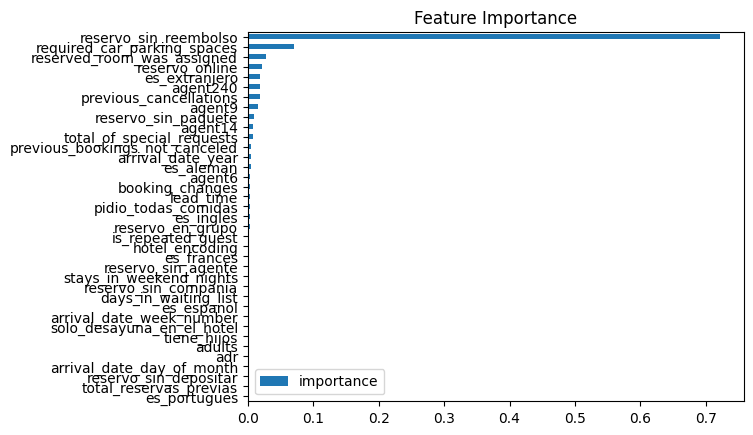

In [7]:
print("f1 score sobre validacion: ", f1_score(y_val, clf.predict(X_val)))
print("f1 score sobre train: ", f1_score(y_train, clf.predict(X_train)))

fi = pd.DataFrame(data=clf.feature_importances_,
             index=clf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Ahora cambiamos algunos parametros:
* `max_depth`: el largo maximo que pueden tener todos los arboles que entrena.
* `subsample`: el porcentaje del dataset elegido al azar que sera utilizado para entrenar a cada arbol.
* `colsample_bytree`: Lo mismo que subsample, pero para las columnas. Es decir que elige al azar las variables que usa el arbol.

Estos ultimos dos parametros nos ayudan a que los arboles sean mas independientes entre si y que no se 'fijen' siempre en la misma parte del dataset. Nos ayudan a disminuir el overfitting.

In [8]:
clf2 = xgb.XGBClassifier(learning_rate=0.1,
                         max_depth=10,
                         subsample=0.8,
                         colsample_bytree=0.6,
                         n_estimators=1000, early_stopping_rounds=50)

clf2.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_val, y_val)],
       verbose=50)

print("f1 score sobre validacion: ", f1_score(y_val, clf2.predict(X_val)))
print("f1 score sobre train: ", f1_score(y_train, clf2.predict(X_train)))

[0]	validation_0-logloss:0.64519	validation_1-logloss:0.64618
[50]	validation_0-logloss:0.25587	validation_1-logloss:0.28996
[100]	validation_0-logloss:0.21171	validation_1-logloss:0.27319
[150]	validation_0-logloss:0.18194	validation_1-logloss:0.26844
[200]	validation_0-logloss:0.15574	validation_1-logloss:0.26620
[250]	validation_0-logloss:0.13526	validation_1-logloss:0.26593
[258]	validation_0-logloss:0.13320	validation_1-logloss:0.26610
f1 score sobre validacion:  0.8780803311558114
f1 score sobre train:  0.9532085276766128


In [15]:
clf3 = xgb.XGBClassifier(learning_rate=0.1,
                         max_depth=13,
                         subsample=0.85,
                         colsample_bytree=0.7,
                         # regularizacion:
                         gamma=5,
                         reg_lambda=2,
                         reg_alpha=2,
                         n_estimators=500, early_stopping_rounds=50)

clf3.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_val, y_val)],
       verbose=50)

print("f1 score sobre validacion: ", f1_score(y_val, clf3.predict(X_val)))
print("f1 score sobre train: ", f1_score(y_train, clf3.predict(X_train)))

[0]	validation_0-logloss:0.64426	validation_1-logloss:0.64567
[50]	validation_0-logloss:0.27338	validation_1-logloss:0.29251
[100]	validation_0-logloss:0.25507	validation_1-logloss:0.28265
[150]	validation_0-logloss:0.24781	validation_1-logloss:0.28025
[200]	validation_0-logloss:0.24234	validation_1-logloss:0.27871
[250]	validation_0-logloss:0.23868	validation_1-logloss:0.27805
[300]	validation_0-logloss:0.23602	validation_1-logloss:0.27754
[350]	validation_0-logloss:0.23348	validation_1-logloss:0.27699
[400]	validation_0-logloss:0.23097	validation_1-logloss:0.27673
[450]	validation_0-logloss:0.22907	validation_1-logloss:0.27649
[499]	validation_0-logloss:0.22711	validation_1-logloss:0.27615
f1 score sobre validacion:  0.8735840507476214
f1 score sobre train:  0.90564667691782


Ahora que tenemos una idea de como se comporta el modelo 

In [16]:
param_grid = {
 'max_depth': list(range(10,16)),
 'subsample': [0.6,0.7,0.8,0.9,1],
 'colsample_bytree': [0.6,0.7,0.8,0.9,1],
}

xgb_clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=400)

grid = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, cv=3, n_iter=10, scoring=make_scorer(f1_score))
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=400, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'max_depth': [10, 11, 12, 13, 14, 15],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
                   scoring=make_scorer(f1_score))

In [17]:
grid.best_params_

{'subsample': 1, 'max_depth': 11, 'colsample_bytree': 0.7}

In [18]:
f1_score(y_val, grid.predict(X_val))

0.88270326255826

In [19]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_max_depth,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,25.334752,1.910132,0.215221,0.098063,0.6,14,0.9,"{'subsample': 0.6, 'max_depth': 14, 'colsample...",0.870997,0.872737,0.872666,0.872133,0.000804,9
1,16.609708,0.566759,0.129268,0.019418,0.8,11,1,"{'subsample': 0.8, 'max_depth': 11, 'colsample...",0.872554,0.876376,0.877033,0.875321,0.001975,5
2,17.589201,2.990571,0.111735,0.002637,0.6,11,0.6,"{'subsample': 0.6, 'max_depth': 11, 'colsample...",0.872514,0.874598,0.872926,0.873346,0.000901,7
3,18.796834,2.399064,0.153763,0.024926,1,14,1,"{'subsample': 1, 'max_depth': 14, 'colsample_b...",0.873402,0.876592,0.874044,0.874679,0.001378,6
4,10.170385,0.204495,0.100602,0.000239,1,11,0.7,"{'subsample': 1, 'max_depth': 11, 'colsample_b...",0.874984,0.878607,0.876598,0.876730,0.001482,1
5,14.054869,0.328289,0.158857,0.005032,0.9,15,0.6,"{'subsample': 0.9, 'max_depth': 15, 'colsample...",0.874123,0.876532,0.875803,0.875486,0.001009,4
6,11.940656,1.287748,0.141389,0.032971,0.8,11,0.6,"{'subsample': 0.8, 'max_depth': 11, 'colsample...",0.875225,0.876688,0.875989,0.875967,0.000597,3
7,18.331332,1.249260,0.131802,0.000145,0.6,13,1,"{'subsample': 0.6, 'max_depth': 13, 'colsample...",0.871871,0.873272,0.872989,0.872711,0.000605,8
8,8.763673,0.006013,0.102653,0.000070,0.9,11,0.6,"{'subsample': 0.9, 'max_depth': 11, 'colsample...",0.873115,0.877759,0.877534,0.876136,0.002138,2
9,14.841536,0.019996,0.142207,0.014620,0.6,13,0.8,"{'subsample': 0.6, 'max_depth': 13, 'colsample...",0.871745,0.870712,0.872993,0.871817,0.000933,10


In [21]:
y_pred = grid.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

F1 Score: 0.88270326255826
Precision: 0.874326750448833
Recall: 0.8912418300653595
Accuracy: 0.8829381743006655


Ploteamos las matrices de confusion, ambas para el conjunto de entrenamiento como el de validacion:

Text(0.5, 1.0, 'Confusion matrix de training set')

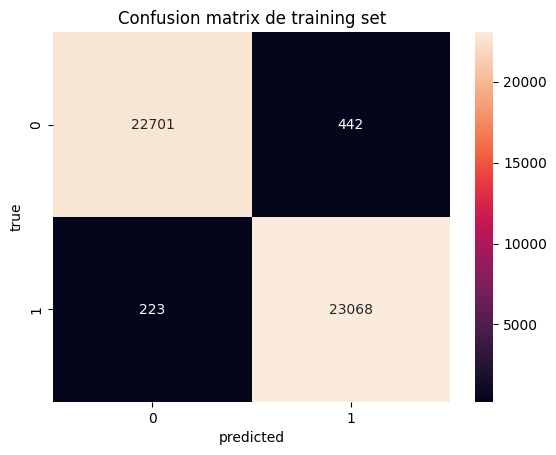

In [25]:
y_pred = grid.predict(X_train)
confusion = confusion_matrix(y_train, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de training set")

precision 0.874326750448833
recall 0.8912418300653595


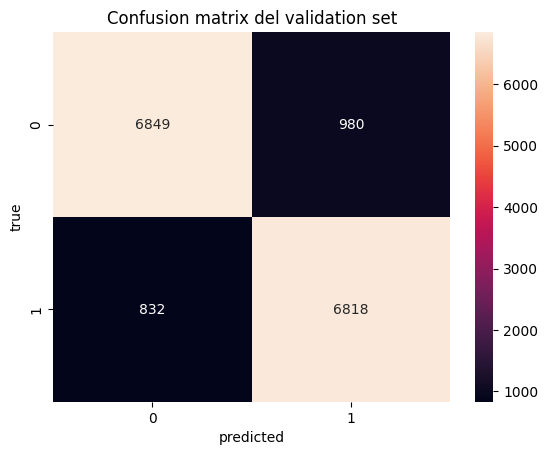

In [26]:
y_pred = grid.predict(X_val)
confusion = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix del validation set")
print("precision", precision_score(y_val, y_pred))
print("recall", recall_score(y_val, y_pred))

# Creacion de submit

In [27]:
def create_submission(model): 
    df_test = pd.read_csv("../dataset/hotels_test_procesado.csv")
    assert(len(df_test)==26535)

    prediccion = model.predict(df_test[attrs].values)
    assert(len(prediccion)==26535)

    submit = pd.DataFrame(
        {"is_canceled": prediccion},
        index=df_test["id"],
    )
    assert(len(submit)==26535)

    submit.to_csv("../dataset/submit.csv")

In [29]:
create_submission(grid)

# Guardando el modelo con pickle

Guardamos la svm con pickle:

In [ ]:
import pickle

with open('../modelos/xgb.pickle', 'wb') as file:
    pickle.dump(model, file)